In [2]:
import pandas_datareader as pdr

C:\Users\mingj\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas as pd

In [19]:
df=pd.read_csv(r'C:\Users\mingj\OneDrive\Desktop\daily.csv')
df=df.dropna()
df.set_index("Date", inplace = True)

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
02/01/2009,2.203,2.417,2.159,2.416,2.416,0.0
05/01/2009,2.485,2.520,2.409,2.488,2.488,0.0
06/01/2009,2.557,2.614,2.467,2.505,2.505,0.0
07/01/2009,2.474,2.537,2.455,2.494,2.494,0.0
08/01/2009,2.441,2.494,2.408,2.445,2.445,0.0


In [22]:
df=pd.DataFrame(df['Close'])
df

,Close
Date,
02/01/2009,2.416
05/01/2009,2.488
06/01/2009,2.505
07/01/2009,2.494
08/01/2009,2.445
...,...
20/12/2019,1.917
23/12/2019,1.935
26/12/2019,1.905


In [23]:
import matplotlib.pyplot as plt

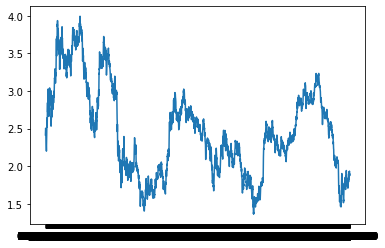

In [24]:
plt.plot(df)

In [25]:
import numpy as np

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))

In [30]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [31]:
df

array([[0.39954338],
       [0.42694064],
       [0.43340944],
       ...,
       [0.20509893],
       [0.19330289],
       [0.20129376]])

In [32]:
training_size=int(len(df)*0.7)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [33]:
training_size,test_size


(1920, 823)

In [37]:
train_data

array([[0.66373166],
       [0.51446541],
       [0.69853249],
       [0.84150943],
       [0.86582809],
       [0.85660377],
       [0.81467505],
       [0.77526205],
       [0.81090147],
       [0.73081761],
       [1.        ],
       [0.90188679],
       [0.89601677],
       [0.99580713],
       [0.9245283 ],
       [0.77274633],
       [0.62599581],
       [0.60754717],
       [0.42725367],
       [0.44402516],
       [0.48385744],
       [0.56142558],
       [0.77442348],
       [0.80503145],
       [0.82012579],
       [0.83689727],
       [0.7706499 ],
       [0.66750524],
       [0.71278826],
       [0.56477987],
       [0.31865828],
       [0.19538784],
       [0.30062893],
       [0.2557652 ],
       [0.17316562],
       [0.14297694],
       [0.21761006],
       [0.31781971],
       [0.19161426],
       [0.05157233],
       [0.08427673],
       [0.01425577],
       [0.04360587],
       [0.07505241],
       [0.09559748],
       [0.06205451],
       [0.12494759],
       [0.220

In [34]:
import numpy

In [35]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [46]:
print(X_train.shape), print(y_train.shape)


(1819, 100, 1)
(1819,)


(None, None)

In [44]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
print(X_test.shape), print(ytest.shape)


(722, 100, 1)
(722,)


(None, None)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
29/29 [==============================] - 5s 159ms/step - loss: 0.0375 - val_loss: 0.0025
Epoch 2/100
29/29 [==============================] - 4s 123ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 3/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 4/100
29/29 [==============================] - 4s 135ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 5/100
29/29 [==============================] - 4s 123ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6/100
29/29 [==============================] - 4s 136ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 7/100
29/29 [==============================] - 3s 108ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 8/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 9/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 10/100
29/29 [==============================] - 4s 123ms/step - loss: 0.0023 - val_lo

In [51]:
import tensorflow as tf

In [52]:
tf.__version__

'2.2.0'

In [53]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.0895617305039793

In [56]:
math.sqrt(mean_squared_error(ytest,test_predict))

2.056198167899169

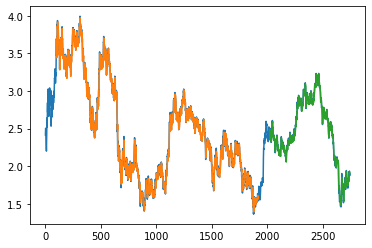

In [58]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
x_input=test_data[723:].reshape(1,-1)
x_input.shape

(1, 100)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.19658056]
101
1 day input [0.12100457 0.13318113 0.14003044 0.10388128 0.1194825  0.08181126
 0.06202435 0.06582953 0.08828006 0.07420091 0.08028919 0.09284627
 0.06164384 0.06811263 0.04718417 0.03805175 0.05707763 0.05327245
 0.03805175 0.03538813 0.07572298 0.07001522 0.09741248 0.12785388
 0.13964992 0.16171994 0.2043379  0.18074581 0.16971081 0.15981735
 0.15525114 0.14802131 0.13013699 0.10235921 0.13926941 0.12138508
 0.11757991 0.11757991 0.10578387 0.08751903 0.06468798 0.05669711
 0.07115677 0.06506849 0.0848554  0.11111111 0.14687976 0.13964992
 0.15410959 0.14535769 0.14878234 0.14497717 0.16210046 0.15296804
 0.14954338 0.152207   0.16552511 0.18531202 0.17846271 0.16438356
 0.12366819 0.13774734 0.15981735 0.19025875 0.17047184 0.2130898
 0.21575342 0.2195586  0.206621   0.19178082 0.17085236 0.17808219
 0.16818874 0.15981735 0.14155251 0.15449011 0.15525114 0.15144597
 0.14231355 0.15258752 0.17884323 0.1305175  0.15791476 0.16400304
 0.18112633 0.1761796  0.17770167 

 0.189448   0.188061   0.18657115 0.18501152]
10 day output [[0.18342035]]
11 day input [0.08028919 0.09284627 0.06164384 0.06811263 0.04718417 0.03805175
 0.05707763 0.05327245 0.03805175 0.03538813 0.07572298 0.07001522
 0.09741248 0.12785388 0.13964992 0.16171994 0.2043379  0.18074581
 0.16971081 0.15981735 0.15525114 0.14802131 0.13013699 0.10235921
 0.13926941 0.12138508 0.11757991 0.11757991 0.10578387 0.08751903
 0.06468798 0.05669711 0.07115677 0.06506849 0.0848554  0.11111111
 0.14687976 0.13964992 0.15410959 0.14535769 0.14878234 0.14497717
 0.16210046 0.15296804 0.14954338 0.152207   0.16552511 0.18531202
 0.17846271 0.16438356 0.12366819 0.13774734 0.15981735 0.19025875
 0.17047184 0.2130898  0.21575342 0.2195586  0.206621   0.19178082
 0.17085236 0.17808219 0.16818874 0.15981735 0.14155251 0.15449011
 0.15525114 0.15144597 0.14231355 0.15258752 0.17884323 0.1305175
 0.15791476 0.16400304 0.18112633 0.1761796  0.17770167 0.16133942
 0.20205479 0.17237443 0.20015221 0.199010

 0.17597225 0.17466176 0.17340529 0.1721943 ]
19 day output [[0.17102022]]
20 day input [0.03538813 0.07572298 0.07001522 0.09741248 0.12785388 0.13964992
 0.16171994 0.2043379  0.18074581 0.16971081 0.15981735 0.15525114
 0.14802131 0.13013699 0.10235921 0.13926941 0.12138508 0.11757991
 0.11757991 0.10578387 0.08751903 0.06468798 0.05669711 0.07115677
 0.06506849 0.0848554  0.11111111 0.14687976 0.13964992 0.15410959
 0.14535769 0.14878234 0.14497717 0.16210046 0.15296804 0.14954338
 0.152207   0.16552511 0.18531202 0.17846271 0.16438356 0.12366819
 0.13774734 0.15981735 0.19025875 0.17047184 0.2130898  0.21575342
 0.2195586  0.206621   0.19178082 0.17085236 0.17808219 0.16818874
 0.15981735 0.14155251 0.15449011 0.15525114 0.15144597 0.14231355
 0.15258752 0.17884323 0.1305175  0.15791476 0.16400304 0.18112633
 0.1761796  0.17770167 0.16133942 0.20205479 0.17237443 0.20015221
 0.19901065 0.21232877 0.20624049 0.20966514 0.21651446 0.20509893
 0.19330289 0.20129376 0.19658056 0.19530

27 day output [[0.16243692]]
28 day input [0.18074581 0.16971081 0.15981735 0.15525114 0.14802131 0.13013699
 0.10235921 0.13926941 0.12138508 0.11757991 0.11757991 0.10578387
 0.08751903 0.06468798 0.05669711 0.07115677 0.06506849 0.0848554
 0.11111111 0.14687976 0.13964992 0.15410959 0.14535769 0.14878234
 0.14497717 0.16210046 0.15296804 0.14954338 0.152207   0.16552511
 0.18531202 0.17846271 0.16438356 0.12366819 0.13774734 0.15981735
 0.19025875 0.17047184 0.2130898  0.21575342 0.2195586  0.206621
 0.19178082 0.17085236 0.17808219 0.16818874 0.15981735 0.14155251
 0.15449011 0.15525114 0.15144597 0.14231355 0.15258752 0.17884323
 0.1305175  0.15791476 0.16400304 0.18112633 0.1761796  0.17770167
 0.16133942 0.20205479 0.17237443 0.20015221 0.19901065 0.21232877
 0.20624049 0.20966514 0.21651446 0.20509893 0.19330289 0.20129376
 0.19658056 0.19530231 0.19403729 0.19294827 0.19186777 0.19071436
 0.189448   0.188061   0.18657115 0.18501152 0.18342035 0.1818338
 0.18028085 0.17878091 0

In [94]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [95]:
len(df)

2743

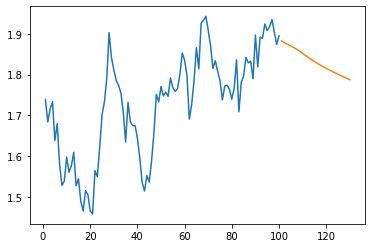

In [97]:
plt.plot(day_new,scaler.inverse_transform(df[2643:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

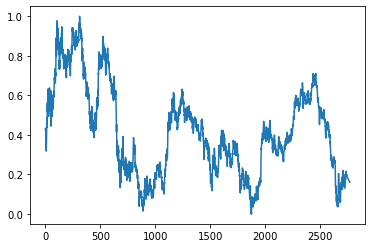

In [100]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1:])